In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [3]:
bs = 64

In [4]:
path = Path('./data/PlantVillage')
os.listdir(path)

['.DS_Store',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [9]:
fnames = get_image_files(path/'Tomato__Tomato_YellowLeaf__Curl_Virus')
fnames[:5]

[WindowsPath('data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00139ae8-d881-4edb-925f-46584b0bd68c___YLCV_NREC 2944.JPG'),
 WindowsPath('data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0036c89d-7743-4895-9fcf-b8d2c1fc8455___YLCV_NREC 0313.JPG'),
 WindowsPath('data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/003bce78-28c9-4612-b148-f621e9a23bd4___YLCV_GCREC 5154.JPG'),
 WindowsPath('data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/004273e3-e283-4ec6-b597-d0de1bfbc590___YLCV_GCREC 2434.JPG'),
 WindowsPath('data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00576ef6-6fa0-40d2-b365-87850597bafd___UF.GRC_YLCV_Lab 01999.JPG')]

In [21]:
#create databunch and get images recursively
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .databunch()
        .normalize(imagenet_stats))
    
        

In [14]:
ImageList

fastai.vision.data.ImageList

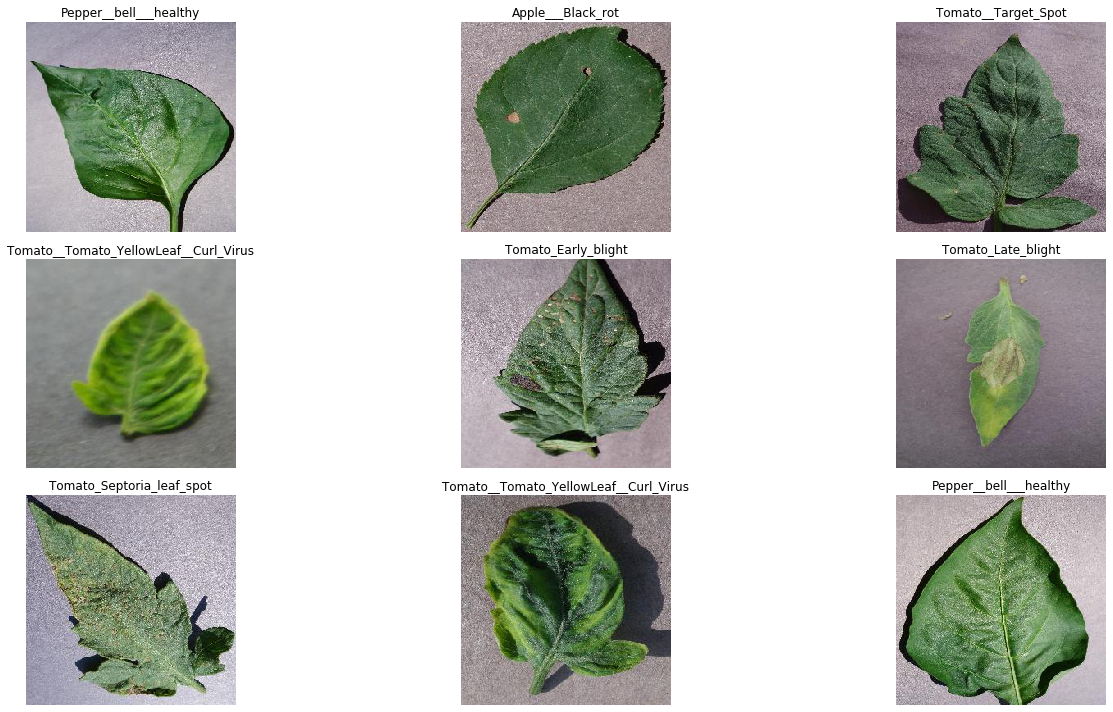

In [23]:
# preview a batch to check labeling etc
data.show_batch(rows=3, figsize=(20,10))

In [24]:
# Check all the different categories in my databunch
print(data.classes)
len(data.classes),data.c

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


(22, 22)

In [25]:
#Create a learner object with our data, resnet34 model and error function
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [26]:
# Details of model created
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.381726,0.188581,0.060257,03:19
1,0.160816,0.087133,0.029384,02:48
2,0.083583,0.059818,0.018970,02:50
3,0.042362,0.053215,0.017296,02:50


In [28]:
#Analyze initial training results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

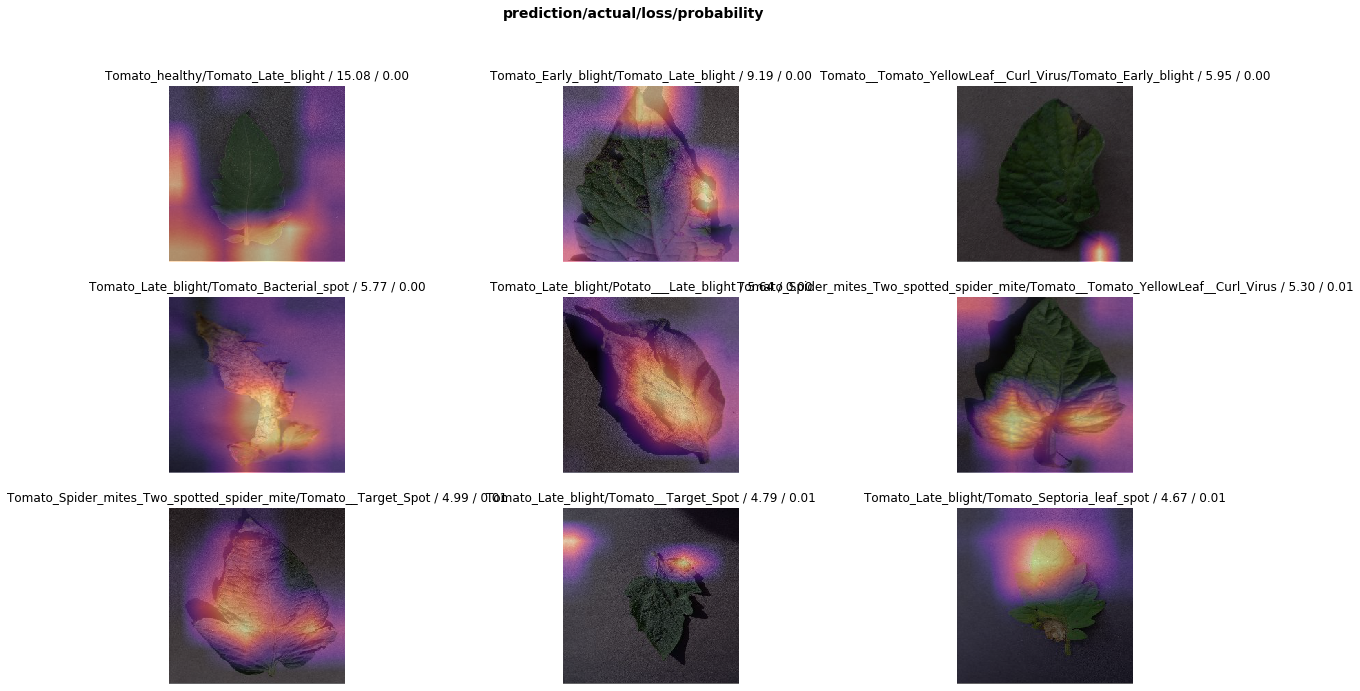

In [32]:
# Visualize and enumarate areas model can improve on
interp.plot_top_losses(9, figsize=(20,11))

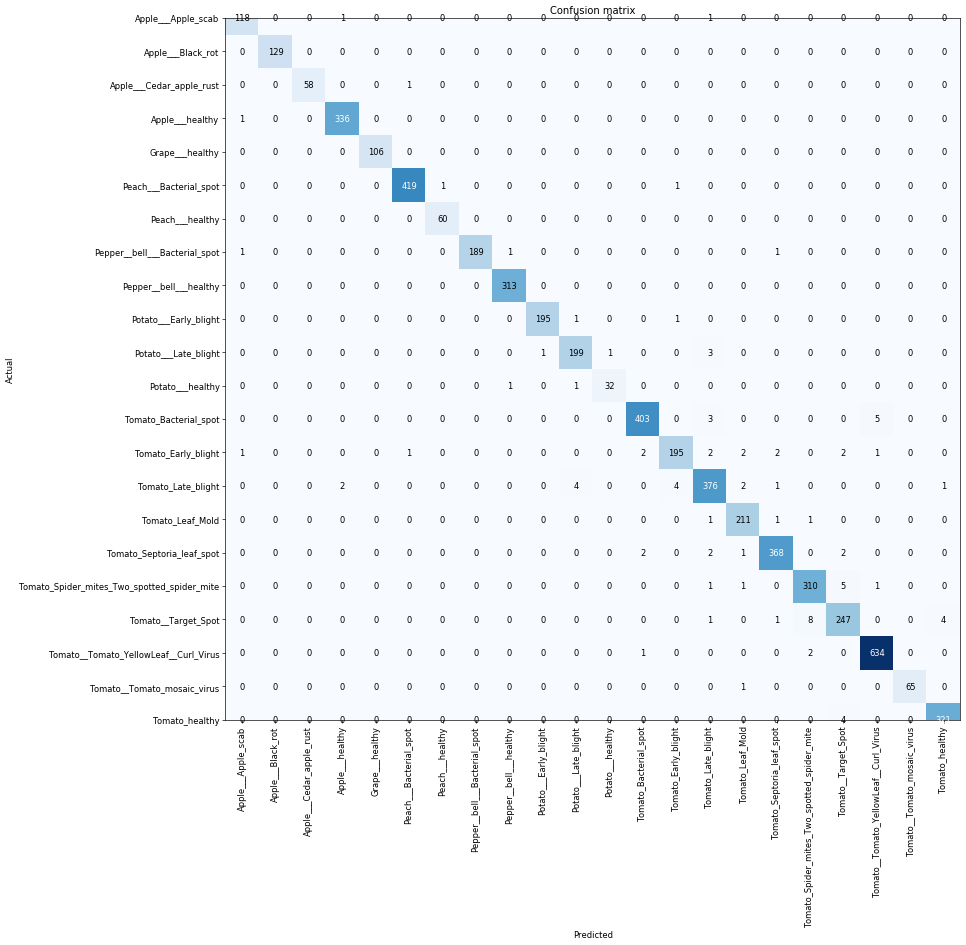

In [33]:
interp.plot_confusion_matrix(figsize=(16,16), dpi=60)

In [31]:
interp.most_confused(min_val=2)

[('Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 8),
 ('Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 5),
 ('Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 5),
 ('Tomato_Late_blight', 'Potato___Late_blight', 4),
 ('Tomato_Late_blight', 'Tomato_Early_blight', 4),
 ('Tomato__Target_Spot', 'Tomato_healthy', 4),
 ('Tomato_healthy', 'Tomato__Target_Spot', 4),
 ('Potato___Late_blight', 'Tomato_Late_blight', 3),
 ('Tomato_Bacterial_spot', 'Tomato_Late_blight', 3),
 ('Tomato_Early_blight', 'Tomato_Bacterial_spot', 2),
 ('Tomato_Early_blight', 'Tomato_Late_blight', 2),
 ('Tomato_Early_blight', 'Tomato_Leaf_Mold', 2),
 ('Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 2),
 ('Tomato_Early_blight', 'Tomato__Target_Spot', 2),
 ('Tomato_Late_blight', 'Apple___healthy', 2),
 ('Tomato_Late_blight', 'Tomato_Leaf_Mold', 2),
 ('Tomato_Septoria_leaf_spot', 'Tomato_Bacterial_spot', 2),
 ('Tomato_Septoria_leaf_spot', 'Tomato_Late_blight', 2)

In [34]:
# we can now use our working model, unfreeze it and train it more
learn.unfreeze()

In [35]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.060596,0.021528,0.007625,03:29


In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


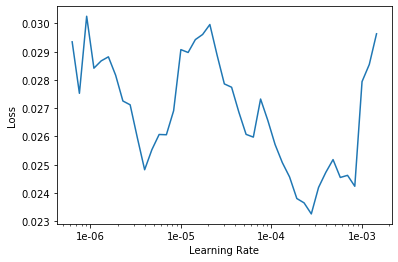

In [37]:
learn.recorder.plot()

We can train our CNN on resnet50, however, an accuracy of 99.24% is very high. Will the extra time be worth the small gain in accuracy?

In [40]:
# save model
learn.save('plantm-1')

# END